In [45]:
#Load library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
#load datasets
df1 = pd.read_csv(r"/Users/blessing/Desktop/DATA ANALYSIS/REGONET PROJECT/1. youth-mortality-rate.csv")
df2 = pd.read_csv(r"/Users/blessing/Desktop/DATA ANALYSIS/REGONET PROJECT/2. number-of-infant-deaths-unwpp.csv")
df3 = pd.read_csv(r"/Users/blessing/Desktop/DATA ANALYSIS/REGONET PROJECT/3. child-mortality-by-income-level-of-country.csv")
df4 = pd.read_csv(r"/Users/blessing/Desktop/DATA ANALYSIS/REGONET PROJECT/4. Distribution of Causes of Death among Children Aged less than 5 years.csv")
df5 = pd.read_csv(r"/Users/blessing/Desktop/DATA ANALYSIS/REGONET PROJECT/5. number-of-maternal-deaths-by-region.csv")
df6 = pd.read_csv(r"/Users/blessing/Desktop/DATA ANALYSIS/REGONET PROJECT/6. births-attended-by-health-staff-sdgs.csv")
df7 = pd.read_csv(r"/Users/blessing/Desktop/DATA ANALYSIS/REGONET PROJECT/7. global-vaccination-coverage.csv")
df8 = pd.read_csv(r"/Users/blessing/Desktop/DATA ANALYSIS/REGONET PROJECT/8. health-protection-coverage.csv")

In [48]:
#fill missing values with 0
df2 = df2.fillna(0)

In [49]:
#drop irrelevant column
df5 = df5.drop(columns='959828-annotations')

In [50]:
#rename columns
df1 = df1.rename(columns={'Under-fifteen mortality rate': 'Youth Mortality'})
df2 = df2.rename(columns={'Deaths - Sex: all - Age: 0 - Variant: estimates': 'Infant Mortality'})
df3 = df3.rename(columns={'Observation value - Indicator: Under-five mortality rate - Sex: Total - Wealth quintile: Total - Unit of measure: Deaths per 100 live births': 'Child Mortality by Income Level'})
df4 = df4.rename(columns={'Location': 'Entity'})
df4 = df4.rename(columns={'Period': 'Year'})
df8 = df8.rename(columns={'Share of population covered by health insurance (ILO (2014))': 'Health Protection Coverage'})

In [55]:
#Drop duplicates
df1.drop_duplicates()
df2.drop_duplicates()
df3.drop_duplicates()
df4.drop_duplicates()
df5.drop_duplicates()
df6.drop_duplicates()
df7.drop_duplicates()
df8.drop_duplicates()

,Entity,Year,Health Protection Coverage
0,Albania,2008,23.6
1,Algeria,2005,85.2
2,American Samoa,2009,3.0
3,Angola,2010,0.0
4,Antigua and Barbuda,2007,51.1
...,...,...,...
157,Venezuela,2010,100.0
158,Vietnam,2010,61.0
159,Yemen,2003,42.0
160,Zambia,2008,8.4


In [56]:
#Verify result by Checking for available duplicates
df1.duplicated().sum()
df2.duplicated().sum()
df3.duplicated().sum()
df4.duplicated().sum()
df5.duplicated().sum()
df6.duplicated().sum()
df7.duplicated().sum()
df8.duplicated().sum()

0

In [57]:
#merge dataframes
merged_df1 = df1.merge(df2,how = 'inner', on = ['Entity','Year'])
merged_df2 = df3.merge(df4,how = 'inner', on = ['Entity','Year'])
merged_df3 = df5.merge(df6,how = 'inner', on = ['Entity','Year'])
merged_df4 = df7.merge(df8,how = 'inner', on = ['Entity','Year'])

In [58]:
#More merginging the merged data frame
merged_df1_2 = merged_df1.merge(merged_df2,how = 'inner', on = ['Entity','Year'])
merged_df3_4 = merged_df3.merge(merged_df4,how = 'inner', on = ['Entity','Year'])

In [60]:
#Keep merging to get the final data frame to work with
Final_Merge = merged_df1_2.merge(merged_df3_4,how = 'inner', on = ['Entity','Year'])

In [62]:
#Objective 1:Identify socioeconomic, healthcare, and environmental factors contributing to high mortality rates.

In [64]:
# Create a list of African countries
afr_entities = ['Algeria', 'Angola', 'Benin', 'Botswana', 'British Indian Ocean Territory',
                 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic',
                 'Chad', 'Comoros', 'Congo', 'Djibouti', 'Egypt',
                 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon',
                 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast',
                 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar',
                 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mayotte',
                 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
                 'Reunion', 'Rwanda', 'Saint Helena', 'Sao Tome and Principe', 'Senegal',
                 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan',
                 'Sudan', 'Tanzania', 'The Democratic Republic of Congo', 'Togo', 'Tunisia',
                 'Uganda', 'Western Sahara', 'Zambia', 'Zimbabwe']
Final_Merge = Final_Merge[Final_Merge['Entity'].isin(afr_entities)]

In [66]:
#View result
Final_Merge.head()

,Entity,Year,Youth Mortality,Infant Mortality,Child Mortality by Income Level,ParentLocation,Age Group,Cause of Death,FactValueNumeric,Estimated maternal deaths,...,Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized),Health Protection Coverage
588,Burkina Faso,2010,14.184238,53687.0,12.112398,Africa,0-27 days,"Other communicable, perinatal and nutritional ...",0.0380,2491.198,...,91.0,NaN,92.0,NaN,90.0,NaN,NaN,82.0,91.0,1.0
589,Burkina Faso,2010,14.184238,53687.0,12.112398,Africa,0-27 days,Other noncommunicable diseases,0.0010,2491.198,...,91.0,NaN,92.0,NaN,90.0,NaN,NaN,82.0,91.0,1.0
590,Burkina Faso,2010,14.184238,53687.0,12.112398,Africa,0-27 days,Injuries,0.0130,2491.198,...,91.0,NaN,92.0,NaN,90.0,NaN,NaN,82.0,91.0,1.0
591,Burkina Faso,2010,14.184238,53687.0,12.112398,Africa,0-27 days,HIV/AIDS,0.0003,2491.198,...,91.0,NaN,92.0,NaN,90.0,NaN,NaN,82.0,91.0,1.0
592,Burkina Faso,2010,14.184238,53687.0,12.112398,Africa,0-27 days,Diarrhoeal diseases,0.0050,2491.198,...,91.0,NaN,92.0,NaN,90.0,NaN,NaN,82.0,91.0,1.0


In [69]:
#Groupby by Entity and Infant Mortality
df_in_mort = Final_Merge.groupby('Entity')['Infant Mortality'].sum().reset_index()
#Sort values to have the highest values on top
df_in_mort.sort_values(by='Infant Mortality', ascending=False)

df_in_mort.head(5)

,Entity,Infant Mortality
0,Burkina Faso,2254854.0
1,Central African Republic,753774.0
2,Djibouti,59556.0
3,Egypt,2461116.0
4,Kenya,2552340.0


In [72]:
#Groupby by Entity and Cause of Death
df_in_mort = Final_Merge.groupby('Entity')['Cause of Death'].sum().reset_index()

df_in_mort.head(5)

,Entity,Cause of Death
0,Burkina Faso,"Other communicable, perinatal and nutritional ..."
1,Central African Republic,"Other communicable, perinatal and nutritional ..."
2,Djibouti,Other noncommunicable diseasesInjuriesHIV/AIDS...
3,Egypt,"Other communicable, perinatal and nutritional ..."
4,Kenya,"Other communicable, perinatal and nutritional ..."


In [74]:
#Groupby by Year and Infant Mortality
df_in_mort = Final_Merge.groupby('Year')['Infant Mortality'].sum().reset_index()
#Sort values to have the highest values on top
df_in_mort.sort_values(by='Infant Mortality', ascending=False)
df_in_mort.head(5)

,Year,Infant Mortality
0,2006,59556.0
1,2007,108612.0
2,2008,29566656.0
3,2009,5588814.0
4,2010,3600366.0


In [76]:
#Groupby by Age Group and Cause of Death
df_in_mort = Final_Merge.groupby('Age Group')['Cause of Death'].sum().reset_index()

df_in_mort

,Age Group,Cause of Death
0,0-27 days,"Other communicable, perinatal and nutritional ..."
1,0-4 years,Congenital anomaliesOther noncommunicable dise...
2,1-59 months,PrematurityBirth asphyxia and birth traumaSeps...


In [78]:
#Groupby by Health Protection Coverage and Infant Mortality
df_in_mort = Final_Merge.groupby('Health Protection Coverage')['Infant Mortality'].sum().reset_index()
#Sort values to have the highest values on top
df_in_mort.sort_values(by='Infant Mortality', ascending=False)
df_in_mort

,Health Protection Coverage,Infant Mortality
0,0.0,1169658.0
1,1.0,3432576.0
2,2.1,8862.0
3,2.2,25182108.0
4,3.7,1661730.0
5,4.0,636552.0
6,6.0,753774.0
7,17.6,188160.0
8,28.0,108612.0
9,30.0,59556.0


In [81]:
#Groupby by Child Mortality by income and cause of death
df_in_mort = Final_Merge.groupby('Child Mortality by Income Level')['Cause of Death'].sum().reset_index()
#Sort values to have the highest values on top
df_in_mort.sort_values(by='Child Mortality by Income Level', ascending=False)
df_in_mort

,Child Mortality by Income Level,Cause of Death
0,1.453562,Sepsis and other infectious conditions of the ...
1,3.130251,"Other communicable, perinatal and nutritional ..."
2,3.938249,Other noncommunicable diseasesInjuriesHIV/AIDS...
3,5.516874,"Other communicable, perinatal and nutritional ..."
4,6.104126,"Other communicable, perinatal and nutritional ..."
5,6.377038,"Other communicable, perinatal and nutritional ..."
6,7.261621,Other noncommunicable diseasesInjuriesHIV/AIDS...
7,8.555538,Other noncommunicable diseasesInjuriesHIV/AIDS...
8,8.888088,"Other communicable, perinatal and nutritional ..."
9,9.022324,"Other communicable, perinatal and nutritional ..."


In [83]:
#Groupby by Child Mortality by income and cause of death
df_in_mort = Final_Merge.groupby('Health Protection Coverage')['Infant Mortality'].sum().reset_index()
#Sort values to have the highest values on top
df_in_mort.sort_values(by='Infant Mortality', ascending=False)
df_in_mort

,Health Protection Coverage,Infant Mortality
0,0.0,1169658.0
1,1.0,3432576.0
2,2.1,8862.0
3,2.2,25182108.0
4,3.7,1661730.0
5,4.0,636552.0
6,6.0,753774.0
7,17.6,188160.0
8,28.0,108612.0
9,30.0,59556.0


In [85]:
# Create a list of Country, Year, and Infant Immunization rates
#This creates a dataframe of entity, year, and all immunization rates so that no other indicator is captured
df_ized = Final_Merge.columns[Final_Merge.columns.str.endswith(('ized)', 'tity', 'ear'))].tolist()

df_ized

['Entity',
 'Year',
 'BCG (% of one-year-olds immunized)',
 'HepB3 (% of one-year-olds immunized)',
 'Hib3 (% of one-year-olds immunized)',
 'IPV1 (% of one-year-olds immunized)',
 'MCV1 (% of one-year-olds immunized)',
 'PCV3 (% of one-year-olds immunized)',
 'Pol3 (% of one-year-olds immunized)',
 'RCV1 (% of one-year-olds immunized)',
 'RotaC (% of one-year-olds immunized)',
 'YFV (% of one-year-olds immunized)',
 'DTP3 (% of one-year-olds immunized)']

In [87]:
# Create a dataframe for Infant Immunization rates
df_infant = Final_Merge[df_ized]
coln = df_ized[2:]
df_infant = df_infant.dropna(subset=coln, how='all').reset_index()
df_infant = df_infant.drop(columns='index')
df_infant.head()

,Entity,Year,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
0,Burkina Faso,2010,99.0,91.0,91.0,NaN,92.0,NaN,90.0,NaN,NaN,82.0,91.0
1,Burkina Faso,2010,99.0,91.0,91.0,NaN,92.0,NaN,90.0,NaN,NaN,82.0,91.0
2,Burkina Faso,2010,99.0,91.0,91.0,NaN,92.0,NaN,90.0,NaN,NaN,82.0,91.0
3,Burkina Faso,2010,99.0,91.0,91.0,NaN,92.0,NaN,90.0,NaN,NaN,82.0,91.0
4,Burkina Faso,2010,99.0,91.0,91.0,NaN,92.0,NaN,90.0,NaN,NaN,82.0,91.0


In [89]:
# Correlation matrix of Infant Immunization rates
df_corr = df_infant[df_ized[2:]]
correlation_matrix = df_corr.corr()  # Pearson correlation by default
correlation_matrix

,BCG (% of one-year-olds immunized),HepB3 (% of one-year-olds immunized),Hib3 (% of one-year-olds immunized),IPV1 (% of one-year-olds immunized),MCV1 (% of one-year-olds immunized),PCV3 (% of one-year-olds immunized),Pol3 (% of one-year-olds immunized),RCV1 (% of one-year-olds immunized),RotaC (% of one-year-olds immunized),YFV (% of one-year-olds immunized),DTP3 (% of one-year-olds immunized)
BCG (% of one-year-olds immunized),1.000000,0.908254,0.693014,NaN,0.842043,NaN,0.846029,1.0,NaN,0.084354,0.889522
HepB3 (% of one-year-olds immunized),0.908254,1.000000,1.000000,NaN,0.891072,NaN,0.946883,1.0,NaN,0.220445,0.990100
Hib3 (% of one-year-olds immunized),0.693014,1.000000,1.000000,NaN,0.866525,NaN,0.984491,NaN,NaN,-0.147773,1.000000
IPV1 (% of one-year-olds immunized),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MCV1 (% of one-year-olds immunized),0.842043,0.891072,0.866525,NaN,1.000000,NaN,0.875402,1.0,NaN,0.066907,0.879032
PCV3 (% of one-year-olds immunized),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pol3 (% of one-year-olds immunized),0.846029,0.946883,0.984491,NaN,0.875402,NaN,1.000000,1.0,NaN,0.117829,0.985456
RCV1 (% of one-year-olds immunized),1.000000,1.000000,NaN,NaN,1.000000,NaN,1.000000,1.0,NaN,NaN,1.000000
RotaC (% of one-year-olds immunized),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YFV (% of one-year-olds immunized),0.084354,0.220445,-0.147773,NaN,0.066907,NaN,0.117829,NaN,NaN,1.000000,0.145490


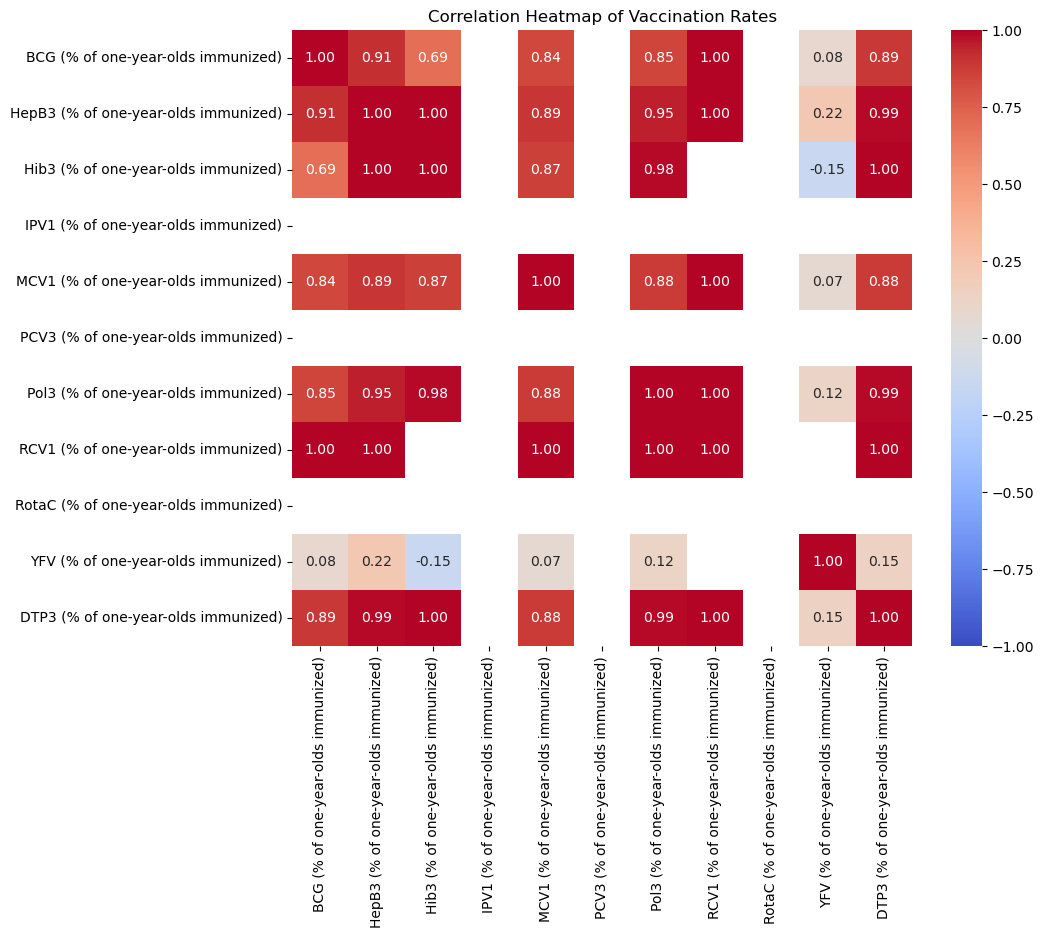

In [91]:
# Correlation Heatmap of Infant immunization rates
plt.figure(figsize=(10, 8)) 

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            vmin=-1,
            vmax=1)

plt.title('Correlation Heatmap of Vaccination Rates')

plt.show() 

In [97]:
# Sort the data
df_in_mort_sorted = df_in_mort.sort_values(by='Infant Mortality', ascending=False)
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Infant Mortality', y='Entity', data=df_in_mort_sorted.head(5), palette='Blues_d')plt.title('Top 5 Entities with Highest Infant Mortality')
plt.xlabel('Infant Mortality')plt.ylabel('Entity')
plt.show()

SyntaxError: invalid syntax (3413959775.py, line 5)